## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.467079 -0.191130 -0.520228  0.495787  1.454333  1.371350
1 -0.184022 -0.963264  0.252435  0.530739  1.188747  0.032118
2  0.224276  1.334503  0.614136 -0.169988 -0.493299  0.430158
3  0.992998  1.357983  0.097664 -0.367249 -0.614162 -0.583734
4  0.315050 -0.245270 -0.926094  1.524241  1.071132  1.649868


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9977208	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9878854	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9775445	total: 59ms	remaining: 19.6s
3:	learn: 0.9675321	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9591891	total: 60.3ms	remaining: 12s
5:	learn: 0.9483406	total: 61ms	remaining: 10.1s
6:	learn: 0.9379481	total: 61.5ms	remaining: 8.72s
7:	learn: 0.9284105	total: 61.9ms	remaining: 7.68s
8:	learn: 0.9198852	total: 62.5ms	remaining: 6.88s
9:	learn: 0.9116711	total: 62.9ms	remaining: 6.23s
10:	learn: 0.9020223	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8923775	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8831597	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8761589	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8687583	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8614414	total: 65.8ms	remaining: 4.05s
16:	learn: 0.8544565	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8458581	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8385953	total: 67.3ms	remaining: 3.47

101:	learn: 0.4202350	total: 108ms	remaining: 947ms
102:	learn: 0.4173258	total: 108ms	remaining: 942ms
103:	learn: 0.4144568	total: 109ms	remaining: 936ms
104:	learn: 0.4115515	total: 109ms	remaining: 931ms
105:	learn: 0.4083639	total: 110ms	remaining: 925ms
106:	learn: 0.4052014	total: 110ms	remaining: 918ms
107:	learn: 0.4020151	total: 111ms	remaining: 913ms
108:	learn: 0.3990320	total: 111ms	remaining: 906ms
109:	learn: 0.3964409	total: 111ms	remaining: 901ms
110:	learn: 0.3937332	total: 112ms	remaining: 895ms
111:	learn: 0.3909893	total: 112ms	remaining: 889ms
112:	learn: 0.3882685	total: 112ms	remaining: 883ms
113:	learn: 0.3854817	total: 113ms	remaining: 877ms
114:	learn: 0.3825123	total: 113ms	remaining: 871ms
115:	learn: 0.3793444	total: 114ms	remaining: 866ms
116:	learn: 0.3770002	total: 114ms	remaining: 860ms
117:	learn: 0.3744903	total: 114ms	remaining: 855ms
118:	learn: 0.3716808	total: 115ms	remaining: 851ms
119:	learn: 0.3687141	total: 115ms	remaining: 845ms
120:	learn: 

270:	learn: 0.1330595	total: 187ms	remaining: 504ms
271:	learn: 0.1323057	total: 188ms	remaining: 503ms
272:	learn: 0.1313352	total: 188ms	remaining: 501ms
273:	learn: 0.1303719	total: 189ms	remaining: 500ms
274:	learn: 0.1296160	total: 189ms	remaining: 498ms
275:	learn: 0.1287234	total: 190ms	remaining: 497ms
276:	learn: 0.1278112	total: 190ms	remaining: 496ms
277:	learn: 0.1270620	total: 191ms	remaining: 496ms
278:	learn: 0.1263602	total: 191ms	remaining: 495ms
279:	learn: 0.1254220	total: 192ms	remaining: 494ms
280:	learn: 0.1246701	total: 192ms	remaining: 492ms
281:	learn: 0.1238238	total: 193ms	remaining: 491ms
282:	learn: 0.1230160	total: 193ms	remaining: 490ms
283:	learn: 0.1222159	total: 194ms	remaining: 489ms
284:	learn: 0.1214909	total: 194ms	remaining: 488ms
285:	learn: 0.1209235	total: 195ms	remaining: 487ms
286:	learn: 0.1200913	total: 195ms	remaining: 485ms
287:	learn: 0.1193173	total: 196ms	remaining: 484ms
288:	learn: 0.1186257	total: 196ms	remaining: 483ms
289:	learn: 

487:	learn: 0.0456933	total: 291ms	remaining: 305ms
488:	learn: 0.0454678	total: 291ms	remaining: 304ms
489:	learn: 0.0452447	total: 292ms	remaining: 304ms
490:	learn: 0.0450250	total: 292ms	remaining: 303ms
491:	learn: 0.0449553	total: 293ms	remaining: 302ms
492:	learn: 0.0447364	total: 293ms	remaining: 301ms
493:	learn: 0.0445228	total: 294ms	remaining: 301ms
494:	learn: 0.0444495	total: 294ms	remaining: 300ms
495:	learn: 0.0442818	total: 295ms	remaining: 299ms
496:	learn: 0.0440305	total: 295ms	remaining: 299ms
497:	learn: 0.0438668	total: 295ms	remaining: 298ms
498:	learn: 0.0438003	total: 296ms	remaining: 297ms
499:	learn: 0.0435894	total: 296ms	remaining: 296ms
500:	learn: 0.0434302	total: 297ms	remaining: 296ms
501:	learn: 0.0432466	total: 297ms	remaining: 295ms
502:	learn: 0.0430912	total: 298ms	remaining: 294ms
503:	learn: 0.0428940	total: 298ms	remaining: 293ms
504:	learn: 0.0428125	total: 299ms	remaining: 293ms
505:	learn: 0.0426119	total: 299ms	remaining: 292ms
506:	learn: 

655:	learn: 0.0214106	total: 370ms	remaining: 194ms
656:	learn: 0.0213236	total: 371ms	remaining: 194ms
657:	learn: 0.0212539	total: 371ms	remaining: 193ms
658:	learn: 0.0211461	total: 372ms	remaining: 192ms
659:	learn: 0.0210531	total: 372ms	remaining: 192ms
660:	learn: 0.0209474	total: 373ms	remaining: 191ms
661:	learn: 0.0208436	total: 373ms	remaining: 191ms
662:	learn: 0.0207523	total: 374ms	remaining: 190ms
663:	learn: 0.0206536	total: 374ms	remaining: 189ms
664:	learn: 0.0205479	total: 374ms	remaining: 189ms
665:	learn: 0.0204397	total: 375ms	remaining: 188ms
666:	learn: 0.0203432	total: 375ms	remaining: 187ms
667:	learn: 0.0202473	total: 376ms	remaining: 187ms
668:	learn: 0.0201424	total: 376ms	remaining: 186ms
669:	learn: 0.0200786	total: 377ms	remaining: 186ms
670:	learn: 0.0200423	total: 377ms	remaining: 185ms
671:	learn: 0.0199443	total: 377ms	remaining: 184ms
672:	learn: 0.0199085	total: 378ms	remaining: 184ms
673:	learn: 0.0198732	total: 378ms	remaining: 183ms
674:	learn: 

872:	learn: 0.0098733	total: 474ms	remaining: 68.9ms
873:	learn: 0.0098639	total: 474ms	remaining: 68.4ms
874:	learn: 0.0098210	total: 475ms	remaining: 67.8ms
875:	learn: 0.0098117	total: 475ms	remaining: 67.3ms
876:	learn: 0.0098026	total: 476ms	remaining: 66.7ms
877:	learn: 0.0097732	total: 476ms	remaining: 66.1ms
878:	learn: 0.0097642	total: 476ms	remaining: 65.6ms
879:	learn: 0.0097275	total: 477ms	remaining: 65ms
880:	learn: 0.0096931	total: 478ms	remaining: 64.5ms
881:	learn: 0.0096830	total: 478ms	remaining: 64ms
882:	learn: 0.0096543	total: 479ms	remaining: 63.4ms
883:	learn: 0.0096444	total: 479ms	remaining: 62.9ms
884:	learn: 0.0096113	total: 480ms	remaining: 62.3ms
885:	learn: 0.0096016	total: 480ms	remaining: 61.8ms
886:	learn: 0.0095686	total: 481ms	remaining: 61.2ms
887:	learn: 0.0095591	total: 481ms	remaining: 60.7ms
888:	learn: 0.0095203	total: 481ms	remaining: 60.1ms
889:	learn: 0.0095110	total: 482ms	remaining: 59.6ms
890:	learn: 0.0094791	total: 482ms	remaining: 59ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

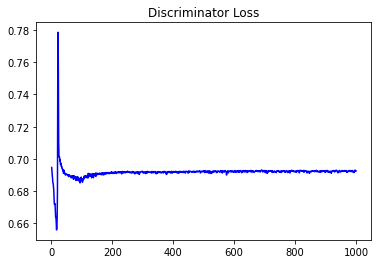

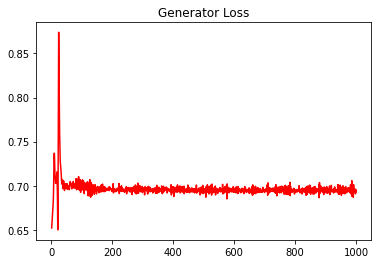

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10626014599742278


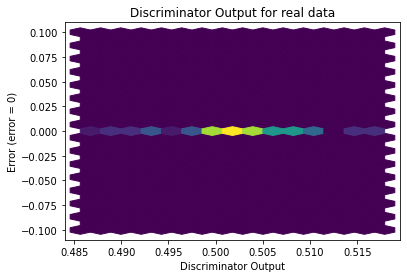

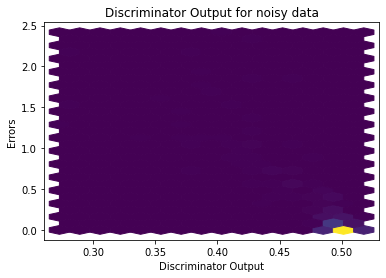

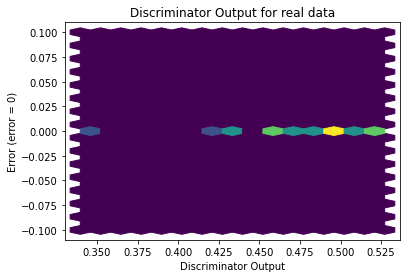

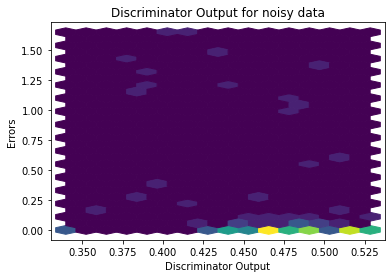

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


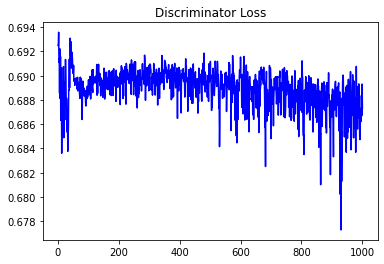

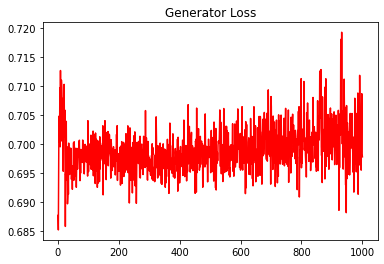

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07405970792720608


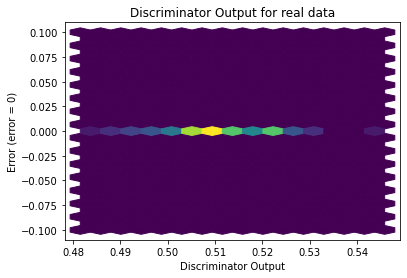

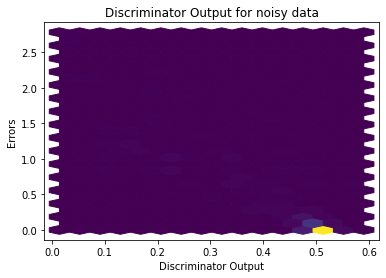

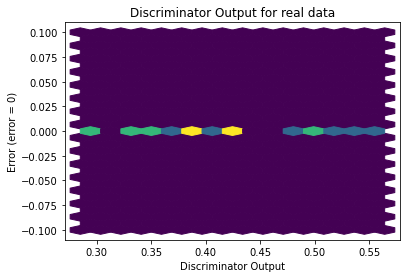

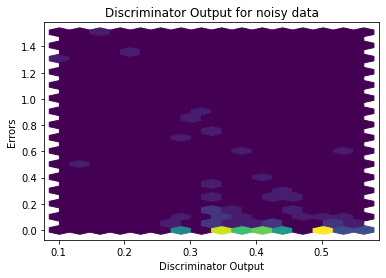

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1376]], requires_grad=True)
